# 주식시세 예측 

## 1. Intro.

먼저, **주식**(stock)에 대해서 간략하게 말하자면 그날그날의 시간(초/분/시간) 단위로 한 주식회사의 주당 가격을 측정하여 매수/매도를 통해서 이루어지는 거래라고 할 수 있습니다. 실시간으로 거래가 이루어지기 때문에 시간 단위로 가격은 계속 바뀌게 되어 있습니다. 심한 경우에는 1분도 되지 않는 시간에 기존 가격 대비 $\pm$30%까지 변화할 수도 있습니다. 그리고 이렇게 짧게는 분/시간 단위로 쌓인 데이터는 일/주/달 단위로 하여 데이터가 쌓이게 되어 다음의 그림처럼 가격의 변화를 알 수 있습니다. 

<div>
<center><img src="./imgs/HTS.png" width="700">
<span style="color:gray">
주식 데이터 예 (그림 출처: https://md2biz.tistory.com/148)
</span></center>
</div>

위의 그림은 일봉(하루 단위로 가격을 봉으로 나타낸 것) 단위로 나타낸 KOSPI 종합지수입니다. 저렇게 봉으로 나타나는 이유는 앞서 말씀드렸듯이, 회사의 주를 매수와 매도에 따라 가격이 변화하게 되기 때문입니다. 

그렇다면, 주식에 있어서 가장 중요한 것은 무엇일까요? 아마도 주식을 아예 하지 않는 분들도 알다시피 주식은 돈을 벌기 위해서 하는 것입니다. 그리고 돈을 버는 방법은 바로 주식을 예측하는 것이죠. 주식은 한 주식회사의 주당 가격 즉 회사의 가치를 나타내는 지표입니다. 그렇기 때문에 회사의 사정(포트폴리오 또는 회계)이나 그날그날의 이슈에 따라서 주식이 오를지 또는 내릴지를 예측할 수 있습니다. 단지,,, 매우 매우 매우 어려울 뿐입니다. 엄밀히 말하면, 주식은 예측이 가능하다고 보는 관점은 과거의 주식시장이 미래에 영향을 미치며, 회사의 사정이 주식에 반영이 되어 있지 않는 다는 관점입니다. 즉, 과거의 데이터를 분석하여 예측을 하는 것이죠. 이에 반해 주식에 있어서 예측이 불가능하다는 관점도 존재합니다. 이들은 주식의 시세는 과거에서 영향을 받는 것이 아니며, 이미 주식의 시세를 분석하는 시점에서 모든 이슈들이 반영되어 있다고 말하고 있습니다. 하지만, 물론 저희는 이미 주식을 예측할 수 있다는 관점이며, 실제로 많은 투자자들이 이런 관점에 속한다고 할 수 있습니다. (그렇지 않으면, 투자할 수가 없겠죠?)

주식을 예측한다는 것은 사실 이미 많은 기법이 개발되었고, 실제로 성공한 투자자들을 통해서 해당 기법을 통해서 예측이 가능하다는 것을 확인할 수 있습니다. 하지만, 주식예측에 있어서 절대적인 기법은 존재하지 않는다는 것이 사실이고, 본 강의에서 하고자 하는 기법 또한 주식을 투자하는 데에 있어서 보조적인 수단으로 작용을 해야할 뿐 과신을 해서는 절대로 안됩니다. 



이제부터는 본격적으로 본 강의에서 하고자하는 주식시세를 예측하는 기법에 대해서 말씀드리도록 하겠습니다. 앞서 말씀드렸듯이 주식은 하루 단위로 하여 가격의 변화를 나타낼 수 있고, 이러한 데이터가 쌓이고 쌓여서 오랫동안 상장(한 회사가 코스피/코스닥에 이름을 올리는 것)을 한 회사들은 많게는 10년에서 적게는 1~2년 정도의 데이터를 보유하고 있습니다. 그렇기 때문에 이러한 데이터를 토대로 하여 주식을 예측하는 것이 가능합니다. 실제로 주식은 회귀본능이 있기 때문에 과거에 보였던 패턴을 다시 보여준다는 설도 있고, 어떻게 보면 딥러닝을 활용해서 주식시세를 예측하는 것 자체가 이러한 맥략과 통한다고도 할 수 있습니다. 즉, 수치화할 수 있는 데이터로서 대표적으로는 날짜별 주식시세를 이용하여 과거의 데이터에 대해서 regression을 한 모델을 통해서 미래를 예측하는 것이 이번 강의의 목표입니다. 

### 실습목표
--------------------
<font size=4>
1. 간단한 주식시세 예측(prediction) 모델을 만들어 본다.  <br><br>
2. statsmodels 의 시계열 분석 모델 중 ARIMA 를 활용해 본다.  <br><br>
3. 관심 있는 주식을 선택하여 주가 데이터를 수집하고, 주식시세를 예측하는 과정을 직접 수행해본다. <br>
</font>

## 2. 데이터 준비하기

### 2-1. 데이터 다운로드

다시 한번 저희의 목적을 언급하자면, 주식을 예측하는 것입니다. 그리고 예측을 통한 주식시세가 오르고 내리는 등의 판단을 하기 위해서는 그에 대한 근거가 필요합니다. 주식시세를 예측하기 위한 데이터는 과거의 일자별 시세이며, 다음의 그림과 같이 [https://finance.yahoo.com/](https://finance.yahoo.com/)에서 아래처럼 따라하시면 다운로드 할 수 있습니다. 

<div>
<center><img src="./imgs/samsung.png" width="800">
<span style="color:gray">
주식 데이터 예 (그림 출처: https://md2biz.tistory.com/148)
</span></center>
</div>

위의 그림에서 알 수 있듯이, 우리는 삼성전자에 대한 주식 시세를 예측하도록 할 것입니다. 이를 위해서 sumsung을 검색하시고, `Time Period`를 Max로 하여 과거 삼성전자가 상장한 시점부터 가장 최근까지의 자료를 Apply합니다. 그리고 Download를 클릭하면 데이터를 다운로드를 할 수 있습니다. 

이제 우리는 데이터를 가지고 있습니다. 지금부터 본격적인 주식시세의 시작입니다. 데이터를 다룰 줄 알아야합니다. 아무리 고가의 보석이라도 흙먼지로 뒤덮이고, 모양이 이쁘지 않으면 소비자들은 사지 않습니다. 닦고 광내서 모양을 이쁘게 해야합니다. 데이터도 마찬가지 입니다. 아무리 요즘 딥러닝이 모든 것을 할 수 있는 것처럼 이슈가 되고 있지만, 데이터가 정제되지 않으면 어떤 전문가도 좋은 결과를 낼 수 없습니다. 하지만, 다행히도 주식 데이터를 다운로드할 수 있는 이 사이트는 데이터를 깔끔하게 잘 정리하여 몇 가지의 핸들링만 진행하면 됩니다. 그리고 이러한 데이터의 핸들리은 `pandas`라는 데이터를 다루는데 특화되어 있는 라이브러리를 사용하도록 하겠습니다. (본래 데이터나 통계학에서는 주로 R을 사용하는 것으로 되어 있으며, python이라는 언어를 위해 만들어진 것이 `pandas`입니다. 그만큼 데이터를 다루고자 하는 분들에게 있어서는 필수적으로 알아야할 라이브러리라고 생각합니다.)


### 2-2. `pandas`를 활용하여 데이터 다루기

먼저, 아래와 같이 `pandas`를 이용하여 데이터를 쉽게 사용할 수 있도록 변수로서 선언하도록 하겠습니다. 

In [4]:
import pandas as pd

In [5]:
data_filename = './005930.KS.csv' # 다운로드한 데이터 파일명
pd_data = pd.read_csv(data_filename).fillna(0) # pandas를 활용하여 데이터를 읽어옴

저는 본 `ipynb`의 파일과 동일한 위치에 데이터를 다운로드하여 저렇게 `data_filename`이 지정됩니다. 다른 위치에 다운로드하신 분들은 `directory`명과 함께 파일명을 지정하시면 됩니다. 그리고 `pandas`에는 이미 `csv`파일을 쉽게 읽어올 수 있도록 하는 모듈인 `read_csv`를 제공합니다. 이렇게 불러오면 아래와 같이 `csv`에서 보는 것과 동일하게 데이터를 불러올 수 있고, 원하는 정보를 사용할 수 있습니다. 

In [6]:
pd_data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,0.090599,74195000.0
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,0.082740,74680000.0
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,0.083333,54390000.0
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,0.082147,40305000.0
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,0.085558,46880000.0


`head`라는 모듈은 읽은 데이터에 대해서 데이터가 어떻게 구성되어 있는지를 사용자에게 보여주는 기능을 합니다. 그리고 위에서처럼 테이블로 표현디 되어있고, `column`를 파악하는 것이 중요합니다. 

* `column`: Date, Open, High, Low, Close, Adj Close, Volume

날짜별로 시작가(Open), 최고가(High), 최저가(Low), 종가(Close), 수정종가(Adj Close), 거래량(Volume)이 저장되어 있는 것을 확인할 수 있지만, 우리는 주식시세 예측에 있어서 `Close`만 사용하도록 하겠습니다. (`Close`는 하루의 장이 마감하였을 때의 가격입니다.)

In [7]:
len(pd_data)

5143

과거의 모든 데이터에 대해서 다운로드 하였고, 위에서처럼 `len()`라는 함수를 사용하여 총 5143일치의 주식시세를 다운했다는 것을 확인할 수 있습니다. 아까도 말씀드렸듯이, 데이터는 가공을 해야 딥러닝에 사용할 수 있습니다. 먼저, 데이터를 가공할 필요가 있는지에 대해서 좀 더 확인하기 쉽도록 그래프로 그려서 알아가 보겠습니다. 

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

그래프를 그리기 위한 라이브러리를 로드하였습니다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 7 columns):
Date         5143 non-null object
Open         5143 non-null float64
High         5143 non-null float64
Low          5143 non-null float64
Close        5143 non-null float64
Adj Close    5143 non-null float64
Volume       5143 non-null float64
dtypes: float64(6), object(1)
memory usage: 281.4+ KB


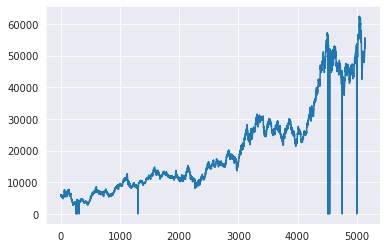

In [9]:
plt.plot(pd_data["Close"])
pd_data.info()

위의 그래프에서 볼 수 있듯이 주식시세가 0으로 되어 있는 말도 안되는 값이 포함되어 있습니다. 이는 앞서서 데이터를 `read_csv`로 로드하는 과정에서 `null`이라는 변수를 모두 0으로 바꾸는 `fillna(0)`을 적용했기 때문입니다. `null`이라는 값은 쓰레기값으로 자동으로 `pandas`에서 생략을 하기 때문에 그대로 두어도 상관없지만, 데이터를 다루고자 할 때 빈 공간이 생기는 것이기 때문에 이에 대한 적절한 처리가 필요합니다. 하지만, 본 강의에서는 주식시세 예측이기 때문에 생략을 해도 된다고 판단하여 지우도록 하겠습니다. 

In [10]:
pd_data = pd_data[pd_data['Close'] != 0]

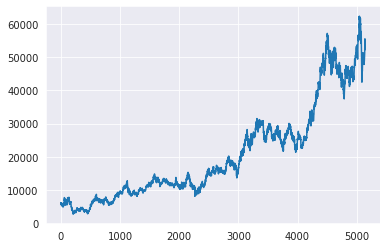

In [11]:
plt.plot(pd_data["Close"])

이제부터 이를 활용하여 어떻게 주식을 예측하는지 알아보겠습니다. 

## 3. ARIMA를 통해서 주식시세 예측하기

먼저, 다음과 같이 주식시세를 예측하는 데에 사용될 ARIMA 모델을 로드하도록 하겠습니다.

In [12]:
import numpy as np

from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

import math

ARIMA는 개인적으로 수학공식을 활용하여 만들수도 있지만 위에서처럼 이미 `statsmodels`라는 라이브러리에서 제공을 하기 때문에 사용하도록 하겠습니다. 그리고 `pmdarima`라이브러리를 활용하여 다른 라이브러리에서 제공하는 ARIMA로는 같은 조건에서 어떻게 결과가 나오는지도 다루어보도록 하겠습니다. (`statsmodel`, `pmdarima`는 `pip`를 활용하여 다운로드 후 사용하시면 됩니다.) 마지막으로 sklearn은 학습에서 사용되는 error 수치를 계산하는 `mean_squared_error`과 `mean_absolute_error`를 제공하고 있습니다. 

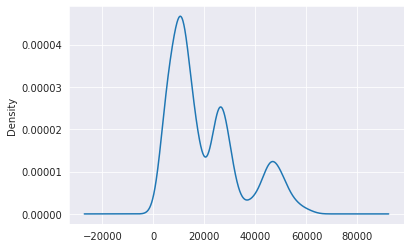

In [13]:
prob_dist_close = pd_data['Close']

prob_dist_close.plot(kind='kde')

위의 그래프는 time-seires이기 때문에 주어진 데이터에 대한 probability distribution을 타나낸 것이고, 이는 거의 normal distribution과 비슷한 트렌드를 가지고 있다는 것을 확인할 수 있습니다. 

그리고 times-series이라는 점에서 다음과 같이 세 가지의 특성을 확인할 수도 있습니다. 

* Level: 평균값


* Trend: 그래프의 증/감 성향


* Seasonality: 반복되는 짧은 주기


* Noise: 나타낼 수 없는 변수

먼저, 우리는 times-series의 데이터는 stationary한 경우에만 분석이 가능하기 때문에 주어진 데이터가 stationaryd인지 아닌지를 파악하도록 하겠습니다. 

#### Augmented Dickey-Fuller (ADF) test

ADF test는 통계학에 있어서 가장 유명한 검증용 이론으로서 주어진 데이터에 unit root가 존재하는지를 확인하도록 도와주며, 이는 주어진 데이터에 대한 stationary를 결정하는 요소가 됩니다. 다음은 이 ADF를 테스트하는 module로서 `statsmodels`의 라이브러리에서 제공하는 `adfuller`를 사용하도록 하겠습니다. 

In [14]:
from statsmodels.tsa.stattools import adfuller

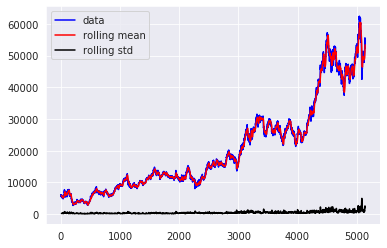

Test Statistics                   0.099457
p-value                           0.966024
No. of lags used                 27.000000
Number of observations used    5104.000000
critical value 1%                -3.431632
critical value 5%                -2.862106
critical value 10%               -2.567072
dtype: float64


In [15]:
def ADF(data):
    rooling_mean = data.rolling(12).mean()
    rooling_std = data.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(data, c='b',label='data')
    plt.plot(rooling_mean, c='r', label='rolling mean')
    plt.plot(rooling_std, c='k', label = 'rolling std')
    plt.legend()
    plt.show()
    
    adft = adfuller(data,autolag='AIC')
    output = pd.Series(adft[0:4], \
                       index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value {}'.format(key)] =  values
    print(output)
    
ADF(prob_dist_close)

위의 그래프를 살펴보면, 우리는 mean과 std가 증가하는 것을 확인할 수 있으며, 이는 주어진 데이터가 stationary가 아니라는 것을 의미합니다. 그리고 이는 단순히 ADF test를 통해서도 `p-value`가 0.05보다 크고, `test statistics`가 `critical value`보다 크다는 점에서 stationary가 아니라는 것을 다시 확인할 수 있습니다. 

따라서, 주어진 데이터는 분석이 불가능하다는 결론이 나오므로, 분석하기 위해서 다음과 같은 과정을 진행하겠습니다. 먼저, 우리는 seasonality와 trend를 주어진 데이터로부터 분리하여 stationary로 만들도록 하겠습니다. 마찬가지로 이를 위해서 `statsmodels`의 라이브러리에서 제공하는 `seasonal_decompose` 모듈을 사용하겠습니다. 

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

/home/wonchul/.virtualenvs/p3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


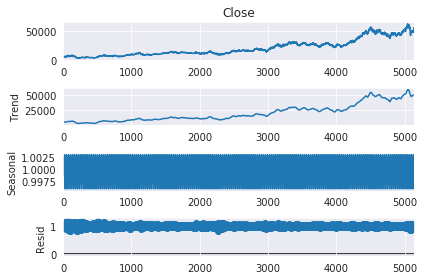

In [20]:
res = seasonal_decompose(prob_dist_close, model='multiplicative', freq = 30)
fig = plt.figure(figsize=())  
fig = res.plot()  

그리고 seaonality를 분리한 데이터에 log를 취하여 trend와 데이터의 값의 크기 자체를 줄이도록 하겠습니다. 이를 위해서 다음과 같이 log를 취하고, 다시 이에 대한 12개월을 단위로 하여 `rolling_mean`과 `rolling_std`를 확인하도록 하겠습니다. 

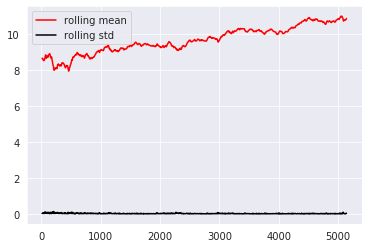

In [24]:
prob_dist_close_log = np.log(prob_dist_close)
rolling_mean_ = prob_dist_close_log.rolling(12).mean()
rolling_std_ = prob_dist_close_log.rolling(12).std()

plt.plot(rolling_mean_, c="r", label = "rolling mean")
plt.plot(rolling_std_, c ="k", label = "rolling std")
plt.legend()
plt.show()

이렇게 다시 주어진 데이터는 stationary가 되었습니다. 다음으로는 앞서 정의한 모델을 통해 학습을 진행하기 위해 ARIMA에 대해서 알아보도록 하겠습니다.

#### ARIMA 란 ?

ARIMA 는 Autoregressive Integrated Moving Average 의 약자로, Autoregressive 는 자귀회귀를 의미하고, Moving Average 는 이동평균을 의미합니다.  
  
ARIMA는 자기회귀와 이동평균을 모두 고려하는 모델이고 시계열의 비정상성(Non-stationary)을 설명하기 위해 관측치 간의 차분(difference)를 이용합니다. ARIMA의 구성요소에 대해 각각의 의미를 조금 더 자세히 설명하면 다음과 같습니다.

- Autoregressive: 이전 관측값의 오차항이 이후 관측값에 영향을 줌


- Integrated: 누적을 의미하며 차분을 이용하는 시계열 모형에 붙는 표현


- Moving Average: 관측값이 이전의 연속적인 오차항의 영향을 받음  
  
현실에 존재하는 시계열 정보들은 불안정(Non-stationary)한 경우가 많습니다. 자기회귀 모형 (AR) 이나 이동평균 모형 (MA), 또는 이 둘을 합한 모형 (ARMA) 으로는 이러한 불안정성을 설명할 수 없고 이를 제거하는 과정을 포함한 것이 ARIMA 모형이라고 생각하시면 됩니다.  
  
ARIMA 는 AR, MA, ARMA 를 모두 표현할 수 있으며 이와 관련된 자세한 내용은 다음 서적을 참고하시면 좋습니다.

참고 서적 : <a href="https://www.amazon.com/Time-Analysis-Forecasting-George-Box/dp/0470272848//">Time Series Analysis: Forecasting and Control</a> - <font color='gray'>George Box, Gwilym Jenkins (1970)</font>



#### ARIMA 모수 설정
ARIMA 를 활용해서 원하는 시계열 예측 모델을 성공적으로 만들기 위해서는 ARIMA 의 모수를 데이터에 맞게 설정해야 합니다. ARIMA 의 모수는 3가지가 있는데, 자기회귀 모형 (AR) 의 Lag 을 의미하는 p, 이동평균 모형 (MA) 의 Lag 을 의미하는 q, 차분 (diffdrence) 횟수를 의미하는 d 입니다. 이들 중 p 와 q 에 대해서는 통상적으로 p + q < 2, p * q = 0 인 값들을 사용하는데, 이는 p 나 q 중 하나의 값이 0이라는 뜻입니다.  
이렇게 하는 이유는 실제로 대부분의 시계열 데이터는 자기회귀 모형 (AR) 이나 이동평균 모형 (MA) 중 하나의 경향만을 강하게 띄기 때문입니다.  
  
그렇다면 p, q, d 는 어떻게 결정할 수 있을까요? <br> 
ACF (Autocorrelation Function) 와 PACF (Partial Autocorrelation Function) 을 통해 결정할 수 있습니다. ACF 란 Lag 에 따른 관측치들 사이의 관련성을 측정하는 함수를 의미하고 PACF 는 다른 관측치의 영향력을 배제하고 두 관측치의 관련성을 측정하는 함수입니다. 우리가 예측해보려는 주식시세 데이터가 자기회귀 모형 (AR) 의 특성을 띄는 경우에는 ACF 가 천천히 감소하고 PACF 는 급격히 감소합니다. 반대로 이동평균 모형 (MA) 의 특성을 띄는 경우에는 ACF 가 급격히 감소하고 PACF 는 천천히 감소합니다. 따라서 급격히 감소하는 시차를 자기회귀 모형 (AR) 과 이동평균 모형 (MA) 의 모수 p, q 로 사용할 수 있습니다. 또 주식시세 데이터를 차분 (difference) 하여 ACF 와 PACF 를 계산함으로 적합한 차분횟수, d 를 구할 수 있습니다. 자세한 내용은 다음 URL 을 참고하세요.

참고 URL : <a href="http://people.duke.edu/~rnau/411home.htm">Statistical forecasting: notes on regression and time series analysis</a> - <font color='gray'>Robert Nau @ Duke University</font>

In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_acf(prob_dist_close_log)
plot_pacf(prob_dist_close_log)
plt.show()

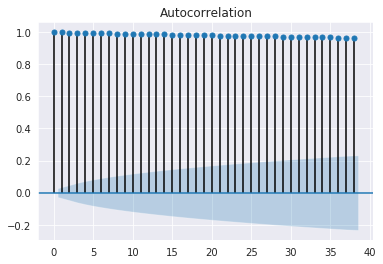

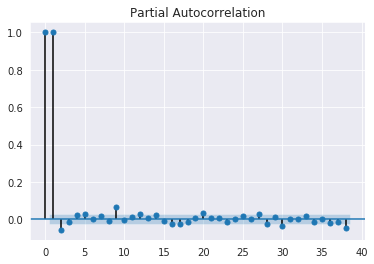

In [23]:
plot_acf(pd_data['Close'])
plot_pacf(pd_data['Close'])
plt.show()

위의 그래프 중 ACF 를 보면 Lag 기준 조금씩 서서히 줄어들고 PACF 의 경우 Lag=1 에서 0.9를 약간 상회하고 그 이후 급격히 감소하는 것을 확인할 수 있습니다. 이를 바탕으로 Samsung 주식시세 데이터는 자기회귀 모형 (AR) 의 특성을 띈다고 할 수 있으며 이에 따라 <font color='blue'>p=1, q=2</font> 로 모수를 설정할 수 있습니다.

나머지 모수인 적절한 차분 차수를 의미하는 d 를 찾기 위해 Samsung 주식시세 데이터를 우선 1차 차분하고 ACF 와 PACF 를 plotting 해보겠습니다.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

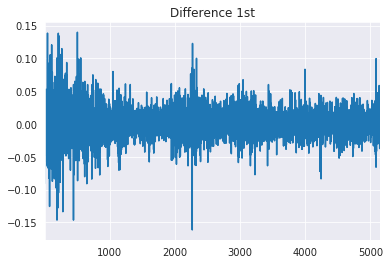

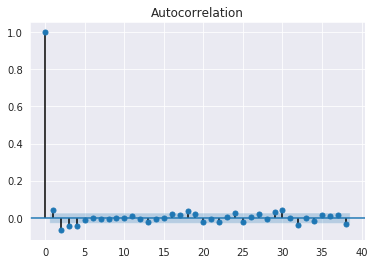

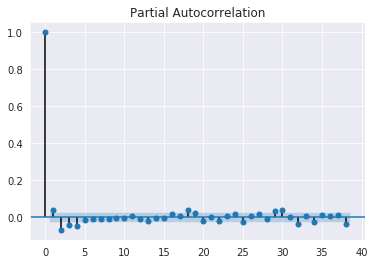

In [44]:
diff_1 = prob_dist_close_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')

plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

1차 차분 이후의 ACF 와 PACF 그래프를 위에서 확인해보면,  
Samsung 주식시세의 시계열이 정상상태(Stationary)를 보이는 것으로 판단되기 때문에 <font color='blue'>d=1</font>로 설정할 수 있습니다.  
  
따라서 Samsung 주식시세 예측을 위한 ARIMA 모델은 ARIMA(p, d, q) = ARIMA(1, 1, 2) 로 설정할 수 있습니다.

이제 ARIMA를 어떻게 학습해야할지에 대한 파라미터를 정하였습니다. 이번에는 학습을 진행하기 위한 데이터 준비로 다시 돌아가도록 하겠습니다. 어떠한 학습을 진행하기 위해서는 데이터를 학습할 데이터와 테스트할 데이터로 나누어야합니다. 그래야 학습한 모델이 잘 동작하는지를 알 수 있습니다. 물론, 테스트 데이터는 절대로 학습이 되어서는 안됩니다. (본래 학습을 하는 과정에서 데이터는 training dataset, validation dataset, 그리고 test dataset의 세 가지의 데이터셋으로 나누는게 정석입니다. training dataset과 validation dataset은 학습과정에서 사용되는 것으로 중간중간 validation과정을 통해서 학습이 잘 이루어지를(예를 들어, 오버핏) 파악하는 것입니다. 그리고 test dataset은 학습이 모두 끝나고 모델의 성능을 평가하는 데 사용합니다. 하지만, 본 강의에서는 편의를 위해 학습 데이터와 테스트 데이터로 나누도록 하겠습니다.) 


데이터를 어떻게 학습과 테스트로 나눌지에 대해서는 개인마다의 차이가 있으며, 태스크나 데이터의 영역/성격에 따라서도 매우 다르지만, 일반적으로는 90:10으로 나눕니다. 그렇기 때문에 우리도 90:10으로 나누도록 하겠습니다. 

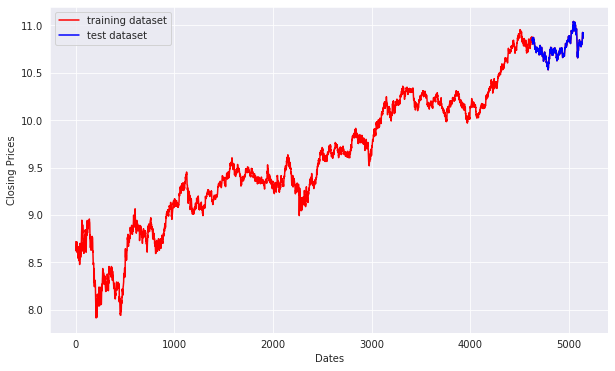

In [45]:
#split data into train and training set
train_data, test_data = prob_dist_close_log[3:int(len(prob_dist_close_log)*0.9)], \
            prob_dist_close_log[int(len(prob_dist_close_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(prob_dist_close_log, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [46]:
print(train_data.shape)
print(test_data.shape)

(4615,)
(514,)


위에서처럼 빨간 그래프가 학습에 이요할 데이터셋이고, 파란색 그래프는 학습한 모델에 대해 테스트를 하는데 사용될 데이터셋입니다. 그리고 각각의 크기는 4615와 514로 어림잡아 90:10이라는 것을 알 수 있습니다. 

In [47]:
from statsmodels.tsa.arima_model import ARIMA

In [48]:
# Build Model
model = ARIMA(train_data, order=(1, 1, 2))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())


/home/wonchul/.virtualenvs/p3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/wonchul/.virtualenvs/p3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 4614
Model:                 ARIMA(1, 1, 2)   Log Likelihood               10859.852
Method:                       css-mle   S.D. of innovations              0.023
Date:                Mon, 15 Jun 2020   AIC                         -21709.704
Time:                        22:20:37   BIC                         -21677.520
Sample:                             1   HQIC                        -21698.378
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.000      1.702      0.089   -7.35e-05       0.001
ar.L1.D.Close     0.5902      0.084      6.987      0.000       0.425       0.756
ma.L1.D.Close    -0.5466      0.084     

이제 학습이 잘 되었는지 확인해보겠습니다. `plot_predict`모듈을 활용하여 실제 학습이 얼마나 잘 되었는지 확인해보겠습니다.

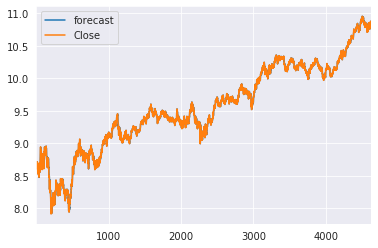

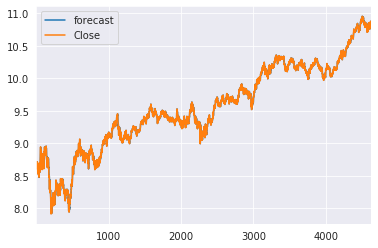

In [49]:
fitted_m.plot_predict()

위의 결과에서 알 수 있듯이, 학습 데이터에 대해서는 거의 완벽하게 학습이 되어 있다는 것을 확인할 수 있었습니다. 하지만, 우리가 하고 싶은 것은 과거에 대해서만 학습하는 것이 아닌, 미래에 대한 예측입니다. 이번에는 테스트 데이터에 대해서 얼머나 예측이 정확한지에 대해서 확인해보겠습니다.

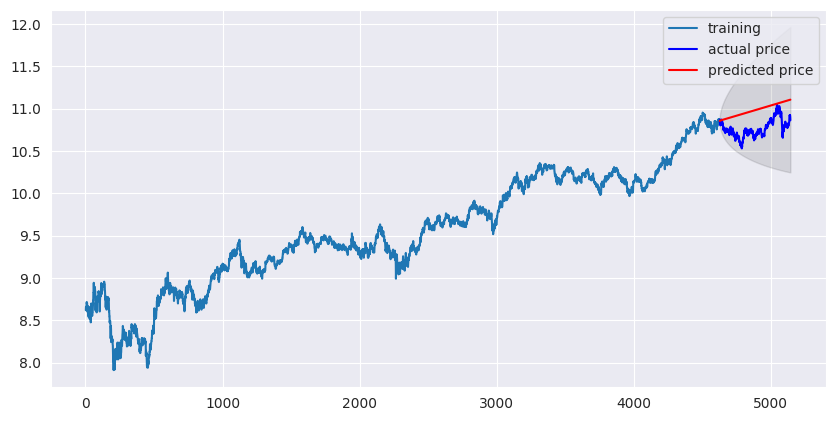

In [50]:
# Forecast
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()


In [51]:
mse = mean_squared_error(test_data, fc)
print('MSE: ', mse)

mae = mean_absolute_error(test_data, fc)
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: ', rmse)

mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: {:.2f}%'.format(mape*100))


MSE:  0.05455770355053464
MAE:  0.2164395696209629
RMSE:  0.23357590532958367
MAPE: 2.02%


그리고 그래프 이외에도 위와 같이 여러 가지 예측값에 대한 실제값의 오차를 계산해보았습니다. 마지막의 [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)가 2.02%라는 것은 97.98%의 정확도를 갖는다는 것을 의미합니다. 

## 미니 프로젝트: SK Hynix  종목의 주식시세를 예측해보자
--------------------
오늘 배운 내용을 바탕으로 자기 자신만의 주식시세 예측 모델을 만들어 보세요~  
가장 먼저 해야할 일은 이번 코스에서 사용한 예인 SK Hynix 종목의 주식 데이터를 다운로드 받아 봅시다. (Step 1 을 참고하세요.)  
그 이후 다운로드 받은 데이터를 해보고 ACF 와 PACF 를 활용하여 ARIMA 모델의 모수를 설정해봅시다. (Step 2 를 참고하세요.)  
마지막으로 ARIMA 모델을 정의한 뒤 학습시키고 얼마나 잘 예측하는지 확인해봅시다. (Step 3 를 참고하세요.)  

도움말) 미니 프로젝트에 활용할 최소한의 라이브러리는 다음과 같습니다. <br>
      <font color='green'>1) from pandas import read_csv</font> - 주식시세 데이터가 저장된 csv 파일을 읽기 위한 라이브러리 <br>
      <font color='green'>2) from statsmodels.tsa.arima_model import ARIMA</font> - ARIMA 모델을 사용하기 위한 라이브러리 <br>

<font color='green'>3) from matplotlib import pyplot as plt</font> - 결과 및 데이터를 시각화 하기 위한 라이브러리